In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datasets import load_dataset


# Loading Dataset

data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()

#Data Clean Up
df.job_posted_date = pd.to_datetime(df.job_posted_date)

#convert job_skills to list
import ast
def clean_li (skill_li):
    if pd.notna(skill_li):
        return ast.literal_eval(skill_li)

In [63]:
df_da = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country']== 'India')].copy() 

df_da = df_da.dropna(subset=['salary_year_avg'])
df_da


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"['python', 'r', 'c++', 'tensorflow', 'tableau']","{'analyst_tools': ['tableau'], 'libraries': ['..."
9143,Data Scientist,Manager - Data Science,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-12 13:28:49,False,False,India,year,79200.0,NaN,BitGo,"['sql', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ..."
16358,Data Scientist,Data Scientist,India,via Ai-Jobs.net,Full-time,False,India,2023-07-19 13:12:35,False,False,India,year,157500.0,NaN,Silent Eight,"['python', 'sql', 'bash', 'postgresql', 'panda...","{'async': ['jira', 'confluence'], 'databases':..."
27440,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-15 13:27:09,False,False,India,year,157500.0,NaN,"AppZen, Inc.","['python', 'r']","{'programming': ['python', 'r']}"
30999,Data Scientist,Data Scientist,"Noida, Uttar Pradesh, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:07,False,False,India,year,157500.0,NaN,HashiCorp,"['python', 'aws', 'numpy', 'pandas', 'tensorfl...","{'cloud': ['aws'], 'libraries': ['numpy', 'pan..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762560,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-12 20:29:35,False,False,India,year,70000.0,NaN,Avaloq,"['python', 'r', 'sql', 'java', 'mysql', 'sql s...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
762634,Data Scientist,Data Modeller,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-23 20:30:17,True,False,India,year,64800.0,NaN,Capco,"['sql', 'python', 'scala', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['sql..."
768729,Data Scientist,Lead Data Modeler/Developer for Business Analy...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-04 01:33:21,False,False,India,year,79200.0,NaN,Bosch Group,['sql'],{'programming': ['sql']}
770989,Data Scientist,"Data Scientist –ML, DL, Python","Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-21 01:12:02,False,False,India,year,157500.0,NaN,Capco,"['python', 'r', 'sql', 't-sql', 'sql server', ...","{'analyst_tools': ['tableau', 'power bi', 'qli..."


In [64]:
df_da = df_da.dropna(subset=['job_skills'])
df_da['job_skills'] = df_da['job_skills'].apply(ast.literal_eval)
df_da = df_da.explode('job_skills')


df_da[['salary_year_avg','job_skills',]]

C:\Users\nis44\AppData\Local\Temp\ipykernel_32908\1054224242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da['job_skills'] = df_da['job_skills'].apply(ast.literal_eval)


,salary_year_avg,job_skills
3930,114516.0,python
3930,114516.0,r
3930,114516.0,c++
3930,114516.0,tensorflow
3930,114516.0,tableau
...,...,...
784768,157500.0,r
784768,157500.0,python
784768,157500.0,sql
784768,157500.0,databricks


In [66]:
df_us_da = df_da.groupby('job_skills')['salary_year_avg'].agg(['count','median'])


df_toppay = df_us_da.sort_values(ascending=False,by='median').head(10).sort_values(ascending=False,by='median')

df_top_count = df_us_da.sort_values(ascending=False,by='count').head(10).sort_values(ascending=False,by='count')
df_top_count =df_top_count.sort_values(ascending=False,by='median')
df_top_count




,count,median
job_skills,,
azure,15,157500.00
pytorch,10,157500.00
python,64,152500.00
tensorflow,16,136008.00
r,30,129758.00
sql,49,113500.00
tableau,19,113500.00
aws,20,103550.00
spark,23,93600.00


<Axes: ylabel='job_skills'>

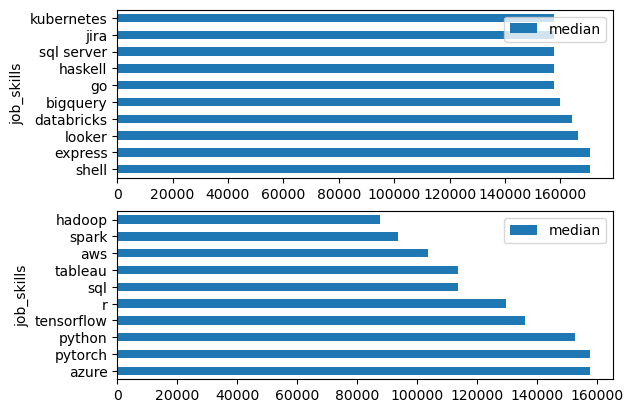

In [67]:
fig , ax =plt.subplots(2,1)

df_toppay.plot(kind='barh', y='median', ax=ax[0])
df_top_count.plot(kind='barh', y='median', ax=ax[1])
